# Premiers essais du module accelaltilog - pre-vols

Chargement des librairies généralement utilisées.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

## Définition des sous-routines

In [2]:
# Sous-routine servant à préparer et formater rapidement des séries de graphs x*y servant à l'exploration des données

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# Define the date format
#date_form = DateFormatter("%m-20%y")

# Subroutine used to create a grid of XY plots
def grid_scatterplot(pgda_data, x_parameter, y_parameters, color_parameter, title):
    import matplotlib.pyplot as plt

    # Definition of the grid size used to display results based on the number of parameters selected
    grid_x=3
    if (len(y_parameters.axes[1])%grid_x==0):
        grid_y=len(y_parameters.axes[1])//grid_x
    else:
        grid_y=len(y_parameters.axes[1])//grid_x+1
    
    # Definition of the plots - Loops over the parameters contained in y_parameters
    fig, axs = plt.subplots(grid_y, grid_x, figsize=(grid_x*4,grid_y*4))
    fig.tight_layout(h_pad=3)
    fig.suptitle(title)
    plt.subplots_adjust(hspace =0.2, top=0.95, wspace=0.5)

    for i in range(0, len(y_parameters.axes[1])):
        colname = y_parameters.columns[i]
        x_pos=(i)%grid_x
        y_pos=(i)//grid_x
        ax = sns.scatterplot(x=x_parameter, y=pgda_data[colname], hue=color_parameter, ax=axs[y_pos,x_pos], palette="deep")
        #scatter.legend(fontsize = 12,bbox_to_anchor= (1.03, 1),title=color_parameter.name, title_fontsize = 12,shadow = True,facecolor = 'white');
        #ax.set(xlabel="Date", ylabel="Calculated inlet losses (inH2O)", title=site_id)
        #ax.xaxis.set_major_formatter(date_form)
        # Ensure ticks fall once every 52 weeks
        #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=52))

# LaMule vol 5

1er essais avec accéléromètre + altimètre + openlog + nano.

## LaMule post-vol 5 - Analyse des données miraculeusement sauvées des bois!

In [3]:
# Create a dataframe to store solver inputs and outputs from the corresponding *xls file then merge into a single one. 
# Repeat for all units.
Data = pd.read_csv('LaMuleV1_vol5_26mars2023.TXT')

# Add proper date field
#Data['date'] = pd.to_datetime(Data['value_timestamp'])

# Prevew results
print("Data: "+str(Data.shape))
duree=(Data['millis'].iloc[-1]-Data['millis'].iloc[0])/1000
print('Durée de l\'enregistrement: '+str(int(duree/60))+' minutes et '+str(round(duree%60,2))+' secondes')
print('Data aquisition frequency: '+str(round(Data.shape[0]/((Data.millis.max()-Data.millis.min())/1000),2))+' Hz')

Data: (116413, 16)
Durée de l'enregistrement: 81 minutes et 46.82 secondes
Data aquisition frequency: 23.72 Hz


In [4]:
print(Data.head())
print(Data.tail())

   millis  roll  pitch   yaw  AccX  AccY  AccZ  GyroX  GyroY  GyroZ  \
0    3508  2.74  -2.53 -2.60  0.07  1.01 -0.02   0.82  -0.75  -0.75   
1    3549  2.71  -2.55 -2.64  0.08  1.00 -0.05   0.43   0.04  -0.87   
2    3591  2.71  -2.53 -2.64  0.07  1.01 -0.05  -0.64   0.04  -0.02   
3    3632  2.72  -2.57 -2.65  0.08  1.01 -0.04   0.27  -0.84  -0.35   
4    3673  2.68  -2.62 -2.70  0.09  1.01 -0.04  -0.27  -0.63  -1.11   

   CurrentTemp  CurrentPres  altitude  altitude_lissee  max_altitude  \
0        14.19       967.36     -0.13            -0.01          0.00   
1        14.20       967.34     -0.01            -0.01          0.00   
2        14.21       967.35     -0.12            -0.02          0.00   
3        14.19       967.25      0.82             0.06          0.06   
4        14.21       967.34      0.02             0.06          0.06   

   phase_vol  
0          0  
1          0  
2          0  
3          0  
4          0  
         millis       roll      pitch      yaw  Ac

Text(0, 0.5, 'Altitude (m)')

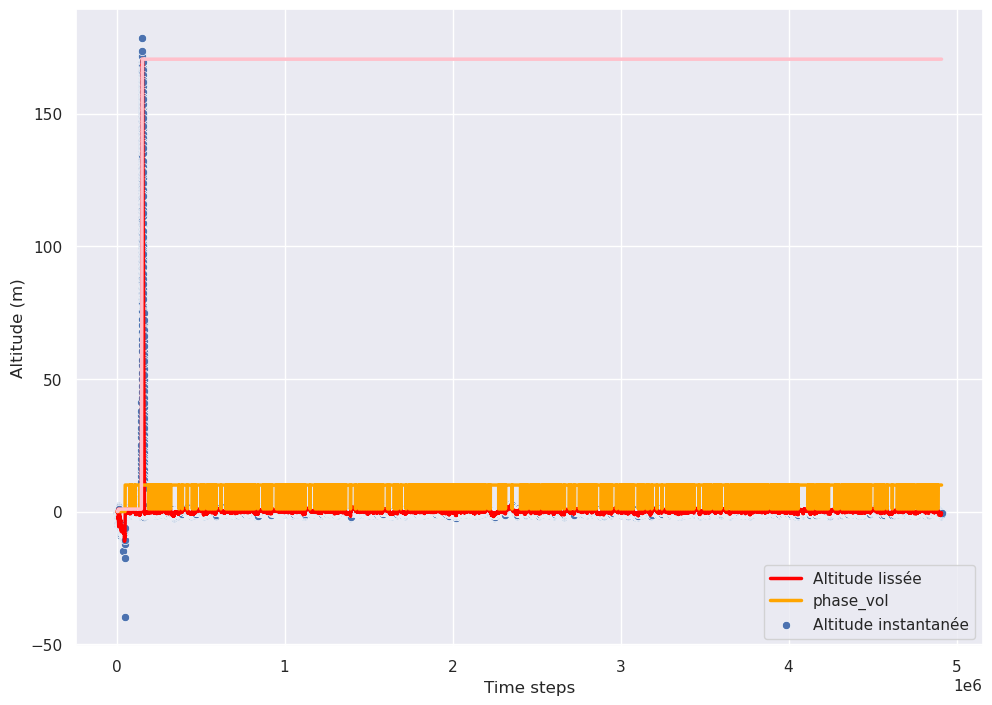

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
#plot=sns.lineplot(x=Data['millis'], y=Data['GyroX'], label='GyroX',color='green', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['phase_vol'], label='phase_vol',color='orange', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['max_altitude'], color='pink', linewidth=2.5)
sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
#plot.set(ylim=(-6, 6))
plot.set_xlabel("Time steps", fontsize = 12)
plot.set_ylabel("Altitude (m)", fontsize = 12)

-0.09608333333333333


Text(0, 0.5, 'Altitude (m)')

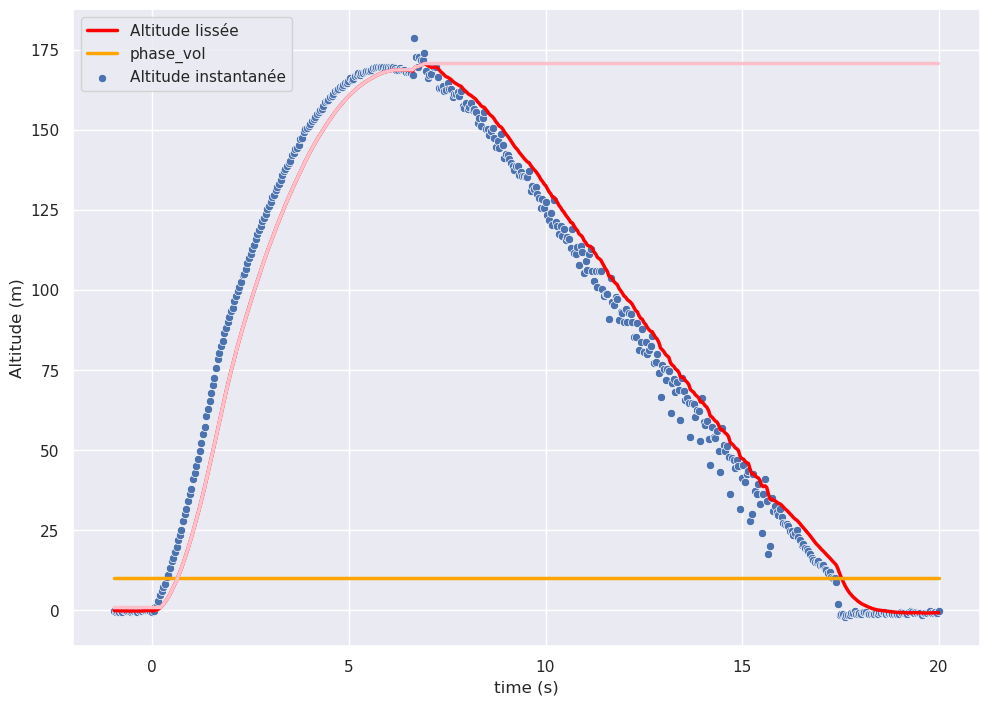

In [12]:
Data['source']='vol 5'

# Instant du décollage - lu sur graph précédent
take_off_time=147000

# Calcul de la valeur moyenne de l'atitude pendant les 10000 millisecondes avant le décollage
altitude_offset=Data[(Data.millis>(take_off_time-5000))&(Data.millis<take_off_time)].altitude.mean()
#print(altitude_offset)
print(altitude_offset)

# Calcul des parametres apres corrections de temps et d'altitude
Data['time_sec']=(Data.millis-take_off_time)/1000.0
Data['alt']=Data['altitude']-altitude_offset
PlotData=Data[(Data.time_sec>-1)&(Data.time_sec<=20)]
#Data=Data[(Data.time_sec>-1)&(Data.time_sec<=20)]

plot=sns.lineplot(x=PlotData['time_sec'], y=PlotData['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
#plot=sns.lineplot(x=Data['millis'], y=Data['GyroX'], label='GyroX',color='green', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['phase_vol'], label='phase_vol',color='orange', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['max_altitude'], color='pink', linewidth=2.5)
sns.scatterplot(x=PlotData['time_sec'], y=PlotData['altitude'], label='Altitude instantanée')
#plot.set(ylim=(-6, 6))
plot.set_xlabel("time (s)", fontsize = 12)
plot.set_ylabel("Altitude (m)", fontsize = 12)

In [13]:
combined_datalog=pd.read_csv('LaMule_multiple_flights.csv')
print(combined_datalog.shape)
print(PlotData.shape)
combined_datalog = pd.concat([combined_datalog, PlotData], ignore_index=True)
print(combined_datalog.shape)
combined_datalog.to_csv('LaMule_multiple_flights.csv', index=False) 

(4136, 19)
(499, 19)
(4635, 19)


   millis  roll  pitch   yaw  AccX  AccY  AccZ  GyroX  GyroY  GyroZ  ...  \
0    3508  2.74  -2.53 -2.60  0.07  1.01 -0.02   0.82  -0.75  -0.75  ...   
1    3549  2.71  -2.55 -2.64  0.08  1.00 -0.05   0.43   0.04  -0.87  ...   
2    3591  2.71  -2.53 -2.64  0.07  1.01 -0.05  -0.64   0.04  -0.02  ...   
3    3632  2.72  -2.57 -2.65  0.08  1.01 -0.04   0.27  -0.84  -0.35  ...   
4    3673  2.68  -2.62 -2.70  0.09  1.01 -0.04  -0.27  -0.63  -1.11  ...   

   altitude_lissee  max_altitude  phase_vol  time_sec  delta_sec  \
0            -0.01          0.00          0  -143.492        NaN   
1            -0.01          0.00          0  -143.451      0.041   
2            -0.02          0.00          0  -143.409      0.042   
3             0.06          0.06          0  -143.368      0.041   
4             0.06          0.06          0  -143.327      0.041   

   vitesse_verticale  vitesse_verticale_lissee  acceleration_verticale  \
0                NaN                  0.000000              

Text(0, 0.5, 'Vitesse verticale (m/s)')

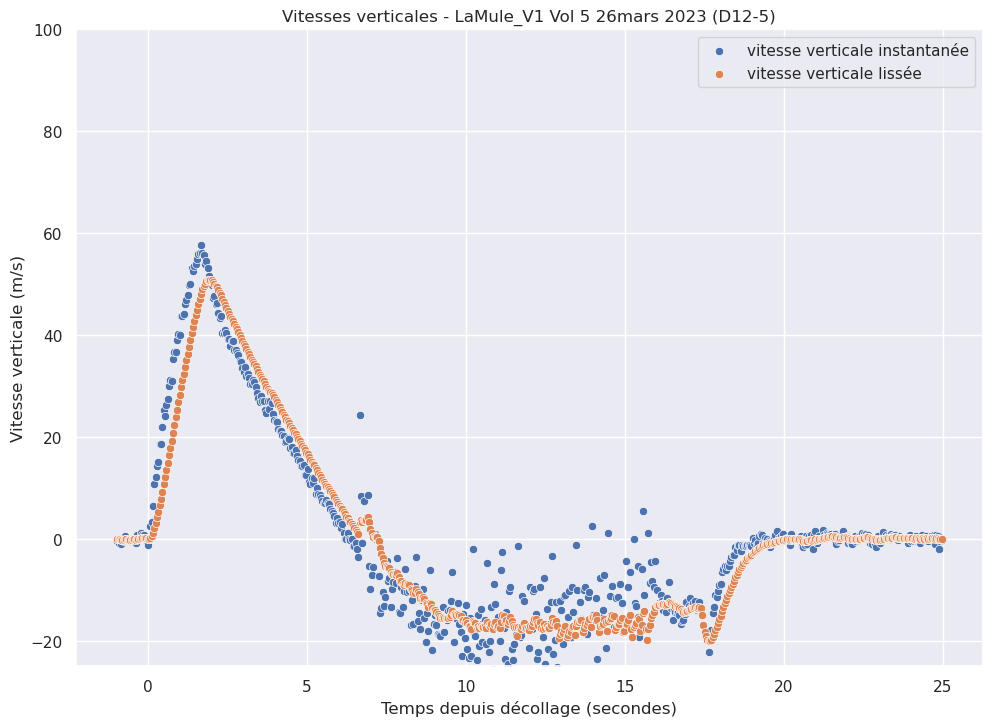

In [53]:
# Calcul de la vitesse verticale par dérivation de l'altitude lissée
Data_diff=Data.diff()
Data['delta_sec']=Data_diff.time_sec  # Pas de temps
Data['vitesse_verticale']=Data_diff.altitude_lissee/Data.delta_sec
print(Data.head())

# Calcul d'une vitesse verticale lissée à l'aide d'un coefficient de lissage
lambda_coef=0.1
size=Data.shape[0]
vitesse_verticale_lissee_instant=0
vitesse_verticale_lissee=[0]*size
for i in range(1,size):
    vitesse_verticale_lissee_instant=Data.vitesse_verticale[i]*lambda_coef+vitesse_verticale_lissee_instant*(1-lambda_coef)
    vitesse_verticale_lissee[i]=vitesse_verticale_lissee_instant
Data['vitesse_verticale_lissee']=vitesse_verticale_lissee

# Graphique de résultat
PlotData=Data[(Data.time_sec>-1)&(Data.time_sec<=25)]
ax=sns.scatterplot(x=PlotData['time_sec'], y=PlotData['vitesse_verticale'], label='vitesse verticale instantanée')
ax=sns.scatterplot(x=PlotData['time_sec'], y=PlotData['vitesse_verticale_lissee'], label='vitesse verticale lissée')
ax.set(ylim=(-25, 100))
ax.set(title='Vitesses verticales - LaMule_V1 Vol 5 26mars 2023 (D12-5)')
ax.set_xlabel("Temps depuis décollage (secondes)", fontsize = 12)
ax.set_ylabel("Vitesse verticale (m/s)", fontsize = 12)

In [110]:
# Détéction de fin d'accélération
print(Data[['time_sec', 'altitude','vitesse_verticale']][Data.vitesse_verticale == Data.vitesse_verticale.max()])
time_motor_burnout=Data[Data.vitesse_verticale == Data.vitesse_verticale.max()]['time_sec']
alt_motor_burnout=Data[Data.vitesse_verticale == Data.vitesse_verticale.max()]['altitude']
speed_motor_burnout=Data[Data.vitesse_verticale == Data.vitesse_verticale.max()]['vitesse_verticale']

# Détéction de l'apogée
alt_apogee=Data[['time_sec', 'altitude','vitesse_verticale']][Data.vitesse_verticale == 0].altitude.max()
print(Data[['time_sec', 'altitude','vitesse_verticale']][(Data.vitesse_verticale == 0)&(Data.altitude==apogee)])
time_apogee=Data[(Data.vitesse_verticale == 0)&(Data.altitude==apogee)]['time_sec']


      time_sec  altitude  vitesse_verticale
3488      1.67     78.49          57.619048
      time_sec  altitude  vitesse_verticale
3619     7.176    169.54                0.0


In [111]:
57.6*3.6
print(alt_motor_burnout)


3488    78.49
Name: altitude, dtype: float64


-0.09608333333333331


Text(3619    6.576
Name: time_sec, dtype: float64, 174.54, 'apogee')

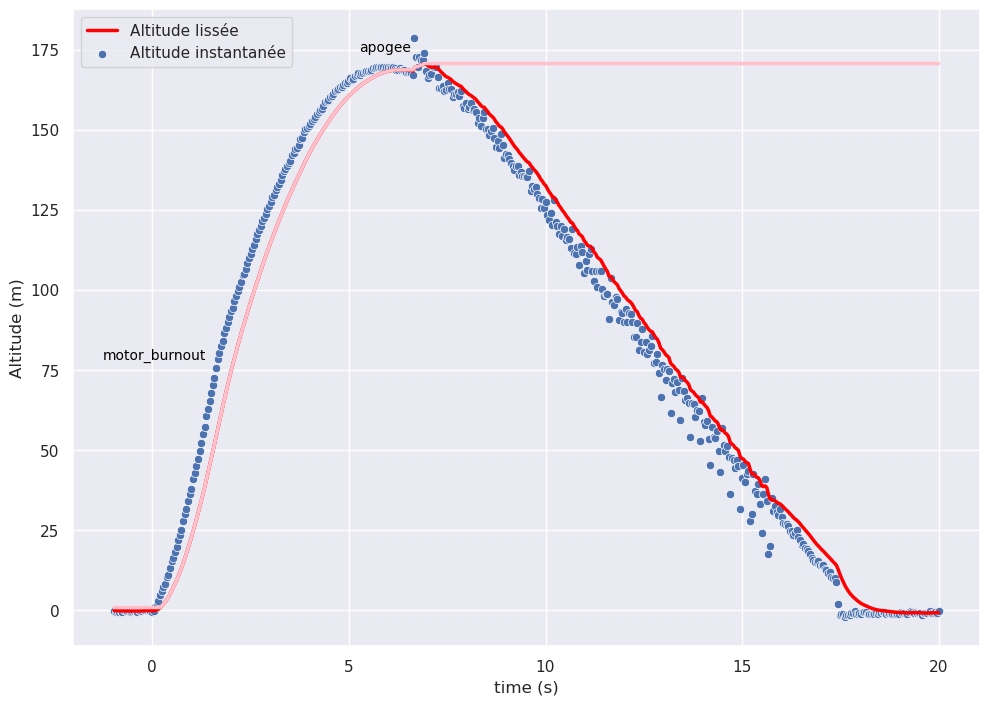

In [126]:
# Instant du décollage - lu sur graph précédent
take_off_time=147000

# Calcul de la valeur moyenne de l'atitude pendant les 10000 millisecondes avant le décollage
altitude_offset=Data[(Data.millis>(take_off_time-5000))&(Data.millis<take_off_time)].altitude.mean()
#print(altitude_offset)
print(altitude_offset)

# Calcul des parametres apres corrections de temps et d'altitude
Data['time_sec']=(Data.millis-take_off_time)/1000.0
PlotData=Data[(Data.time_sec>-1)&(Data.time_sec<=20)]
#Data=Data[(Data.time_sec>-1)&(Data.time_sec<=20)]

plot=sns.lineplot(x=PlotData['time_sec'], y=PlotData['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
#plot=sns.lineplot(x=Data['millis'], y=Data['GyroX'], label='GyroX',color='green', linewidth=2.5)
#sns.lineplot(x=PlotData['time_sec'], y=PlotData['phase_vol'], label='phase_vol',color='orange', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['max_altitude'], color='pink', linewidth=2.5)
sns.scatterplot(x=PlotData['time_sec'], y=PlotData['altitude'], label='Altitude instantanée')
#plot.set(ylim=(-6, 6))
plot.set_xlabel("time (s)", fontsize = 12)
plot.set_ylabel("Altitude (m)", fontsize = 12)
# add text annotation
plot.text(time_motor_burnout-0.3, alt_motor_burnout, "motor_burnout", horizontalalignment='right', size='small', color='black')
plot.text(time_apogee-0.6, alt_apogee+5, "apogee", horizontalalignment='right', size='small', color='black')


Text(0, 0.5, 'Accélération verticale (m/s2)')

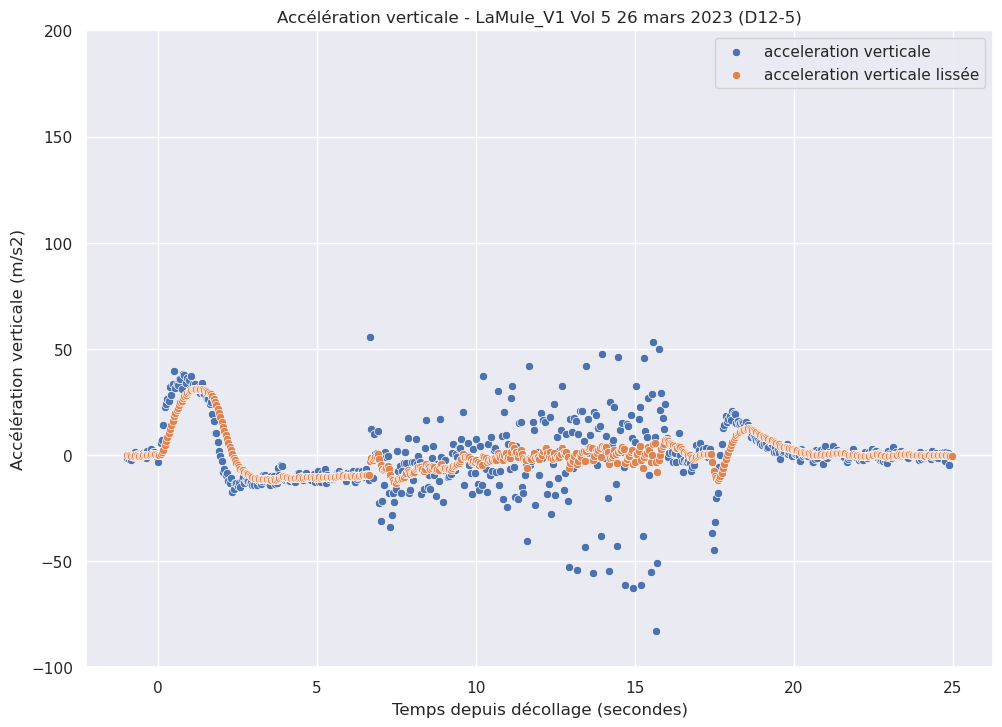

In [54]:
# Calcul de l'acceleration verticale par dérivation de la vitesse verticale lissée
Data_diff2=Data.diff()
Data['acceleration_verticale']=Data_diff2.vitesse_verticale_lissee/Data.delta_sec

# Calcul d'une acceleration verticale lissée à l'aide d'un coefficient de lissage
lambda_coef=0.1
size=Data.shape[0]
acceleration_verticale_lissee_instant=0
acceleration_verticale_lissee=[0]*size
for i in range(1,size):
    acceleration_verticale_lissee_instant=Data.acceleration_verticale[i]*lambda_coef+acceleration_verticale_lissee_instant*(1-lambda_coef)
    acceleration_verticale_lissee[i]=acceleration_verticale_lissee_instant
Data['acceleration_verticale_lissee']=acceleration_verticale_lissee

# Graphique de résultat
PlotData=Data[(Data.time_sec>-1)&(Data.time_sec<=25)]
ax=sns.scatterplot(x=PlotData['time_sec'], y=PlotData['acceleration_verticale'], label='acceleration verticale')
ax=sns.scatterplot(x=PlotData['time_sec'], y=PlotData['acceleration_verticale_lissee'], label='acceleration verticale lissée')
ax.set(ylim=(-100, 200))
ax.set(title='Accélération verticale - LaMule_V1 Vol 5 26 mars 2023 (D12-5)')
ax.set_xlabel("Temps depuis décollage (secondes)", fontsize = 12)
ax.set_ylabel("Accélération verticale (m/s2)", fontsize = 12)

[(4000.0, 8000.0)]

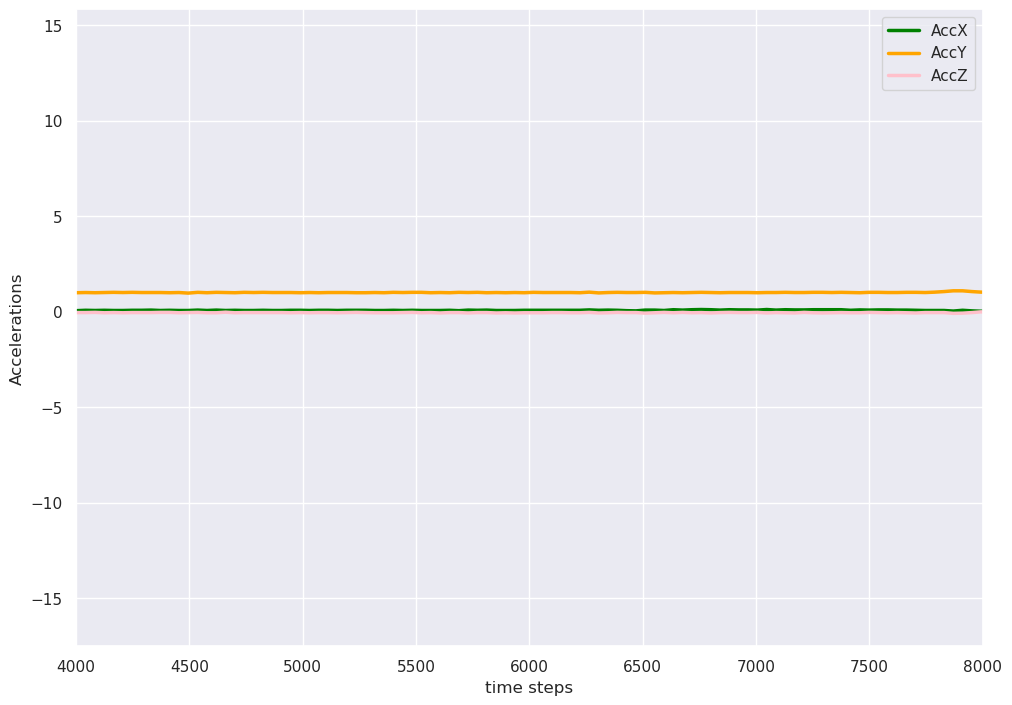

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=Data['millis'], y=Data['AccX'], label='AccX',color='green', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['AccY'], label='AccY',color='orange', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['AccZ'], label='AccZ',color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("time steps", fontsize = 12)
plot.set_ylabel("Accelerations", fontsize = 12)
plot.set(xlim=(4000, 8000))

In [74]:
# Calcul de la valeur moyenne de l'atitude pendant les 10000 millisecondes avant le décollage
AccX_offset=Data[(Data.millis>4000)&(Data.millis<8000)].AccX.mean()
AccY_offset=Data[(Data.millis>4000)&(Data.millis<8000)].AccY.mean()
AccZ_offset=Data[(Data.millis>4000)&(Data.millis<8000)].AccZ.mean()

Data['AccX_cor']=Data.AccX-AccX_offset
Data['AccY_cor']=Data.AccY-AccY_offset
Data['AccZ_cor']=Data.AccZ-AccZ_offset


Text(3619    6.976
Name: time_sec, dtype: float64, -3, 'apogee')

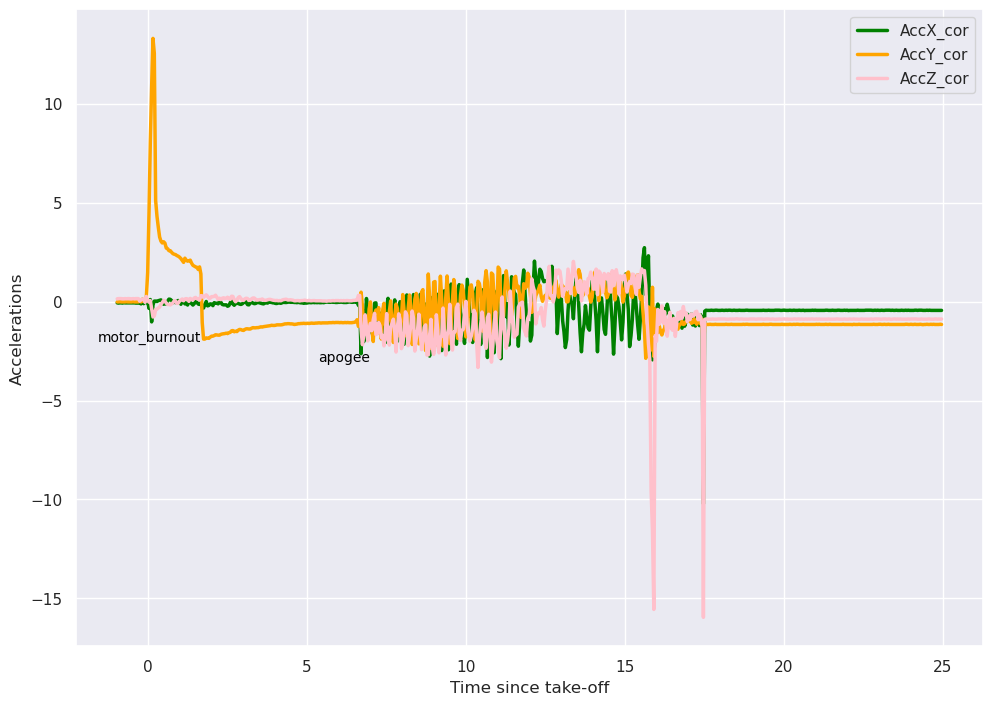

In [125]:
PlotData=Data[(Data.time_sec>-1)&(Data.time_sec<=25)]

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=PlotData['time_sec'], y=Data['AccX_cor'], label='AccX_cor',color='green', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['AccY_cor'], label='AccY_cor',color='orange', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['AccZ_cor'], label='AccZ_cor',color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Time since take-off", fontsize = 12)
plot.set_ylabel("Accelerations", fontsize = 12)
plot.text(time_motor_burnout, 0-2, "motor_burnout", horizontalalignment='right', size='small', color='black')
plot.text(time_apogee-0.2, -3, "apogee", horizontalalignment='right', size='small', color='black')


/tmp/ipykernel_4451/876727386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlotData['acceleration_verticale_lissee_g']=Data.acceleration_verticale_lissee/9.81
/tmp/ipykernel_4451/876727386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlotData['acceleration_verticale_g']=Data.acceleration_verticale/9.81


Text(18, -2, 'Décallage de 1g pour gravité')

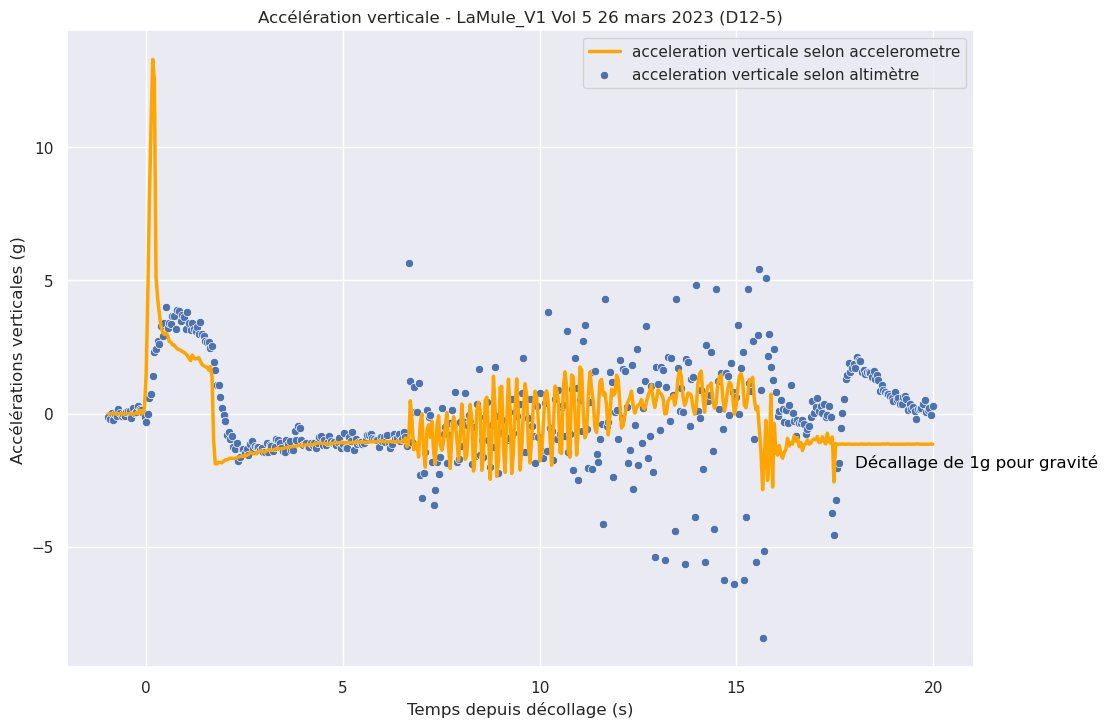

In [127]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
PlotData['acceleration_verticale_lissee_g']=Data.acceleration_verticale_lissee/9.81
PlotData['acceleration_verticale_g']=Data.acceleration_verticale/9.81

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=PlotData['time_sec'], y=PlotData['AccY_cor'], label='acceleration verticale selon accelerometre',color='orange', linewidth=2.5)
#sns.lineplot(x=PlotData['time_sec'], y=PlotData['acceleration_verticale_lissee_g'],label='acceleration verticale selon altimetre',color='pink', linewidth=2.5)
sns.scatterplot(x=PlotData['time_sec'], y=PlotData['acceleration_verticale_g'], label='acceleration verticale selon altimètre')
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Temps depuis décollage (s)", fontsize = 12)
plot.set_ylabel("Accélérations verticales (g)", fontsize = 12)
plot.set(title='Accélération verticale - LaMule_V1 Vol 5 26 mars 2023 (D12-5)')
# add text annotation
plot.text(18, -2, "Décallage de 1g pour gravité", horizontalalignment='left', size='medium', color='black')


Text(0, 0.5, 'Vitesses angulaires (deg/s)')

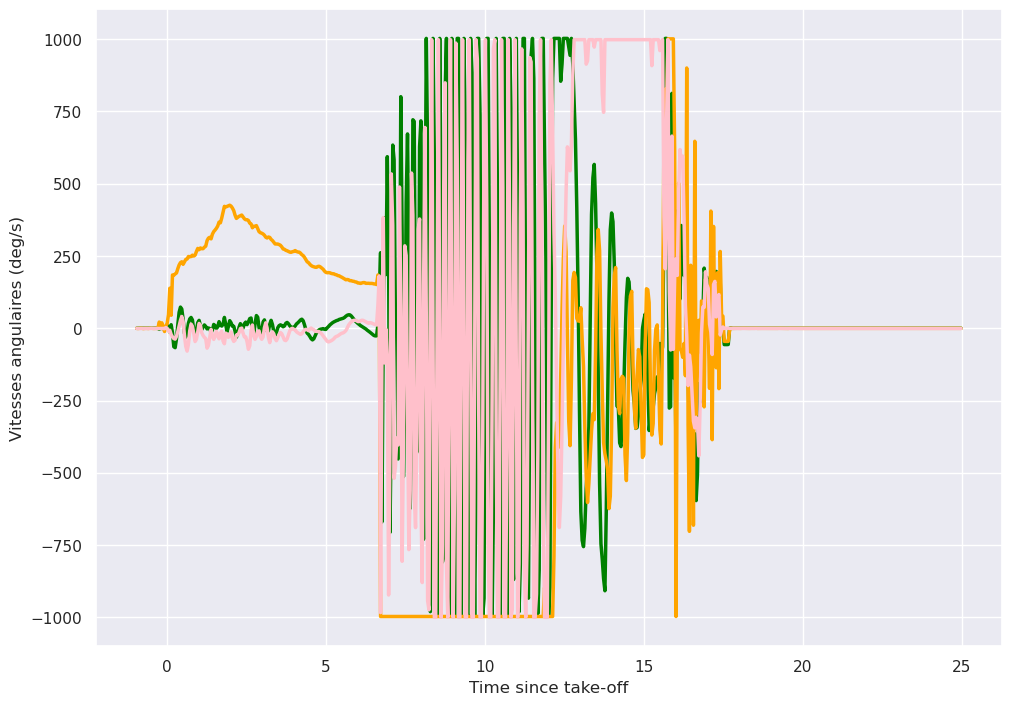

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=PlotData['time_sec'], y=Data['GyroX'], color='green', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['GyroY'], color='orange', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['GyroZ'],color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Time since take-off", fontsize = 12)
plot.set_ylabel("Vitesses angulaires (deg/s)", fontsize = 12)

Text(0, 0.5, 'positions angulaires')

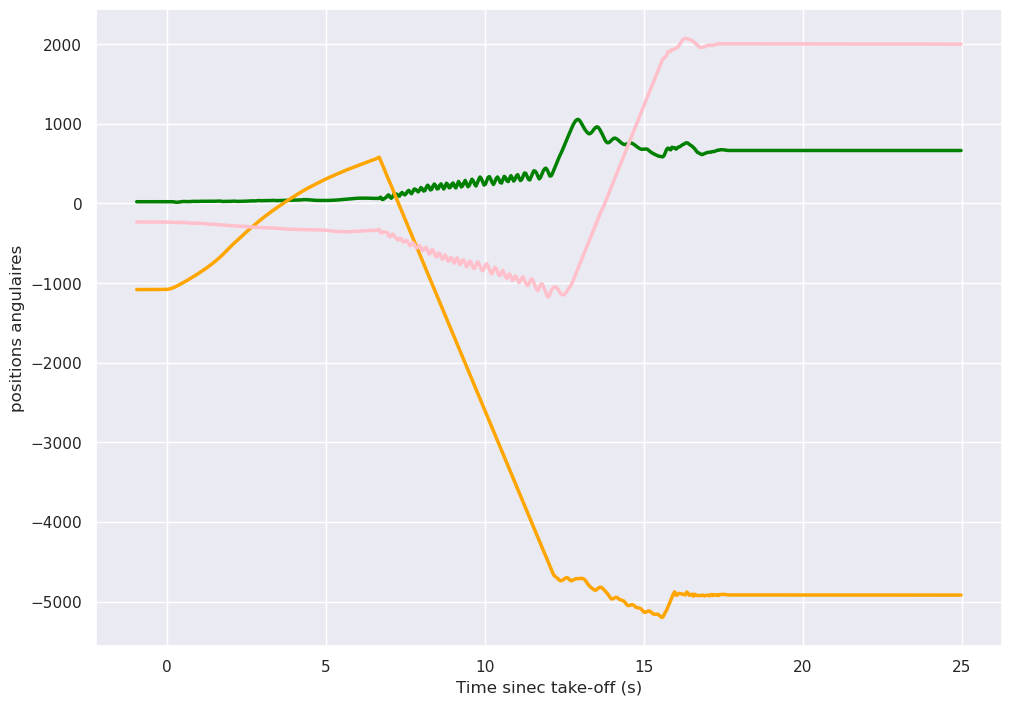

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=PlotData['time_sec'], y=PlotData['roll'],color='green', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['pitch'],color='orange', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['yaw'],color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Time sinec take-off (s)", fontsize = 12)
plot.set_ylabel("positions angulaires", fontsize = 12)

Text(0.5, 25.0, 'Time since take-off (s)')

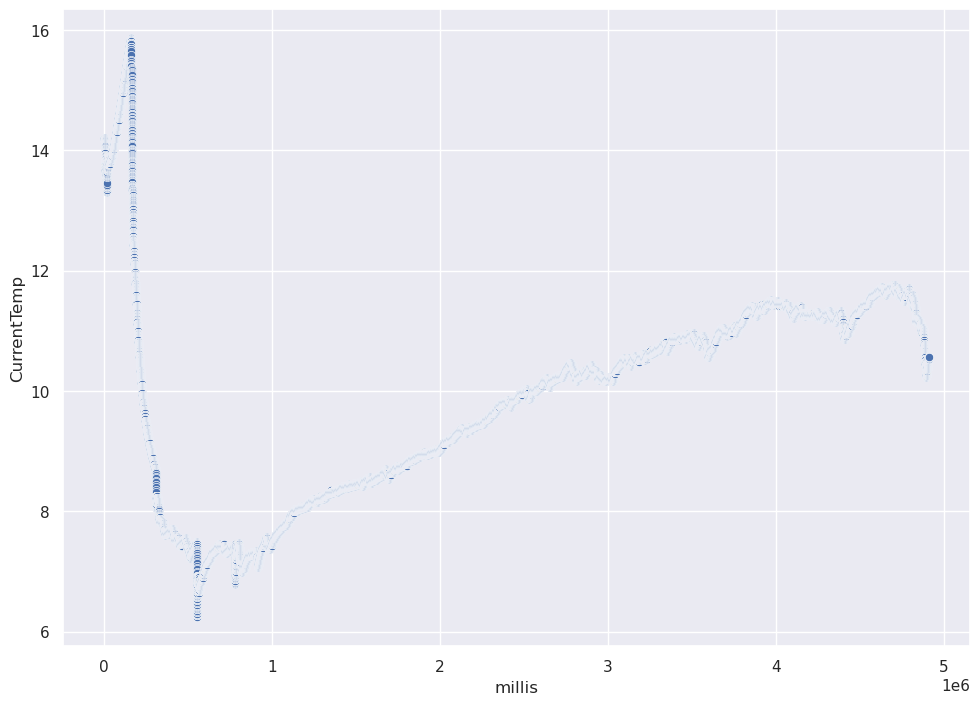

In [59]:
sns.scatterplot(x=Data['millis'], y=Data['CurrentTemp'])
plot.set_xlabel("Time since take-off (s)", fontsize = 12)